In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     domain  scenario      loss  num_rounds
0  behavior         1  0.010698           4
1  behavior         2  0.812333           6
2  behavior         3  0.643321           6
3  behavior         4  0.703994           6
4  behavior         5  0.950242           7


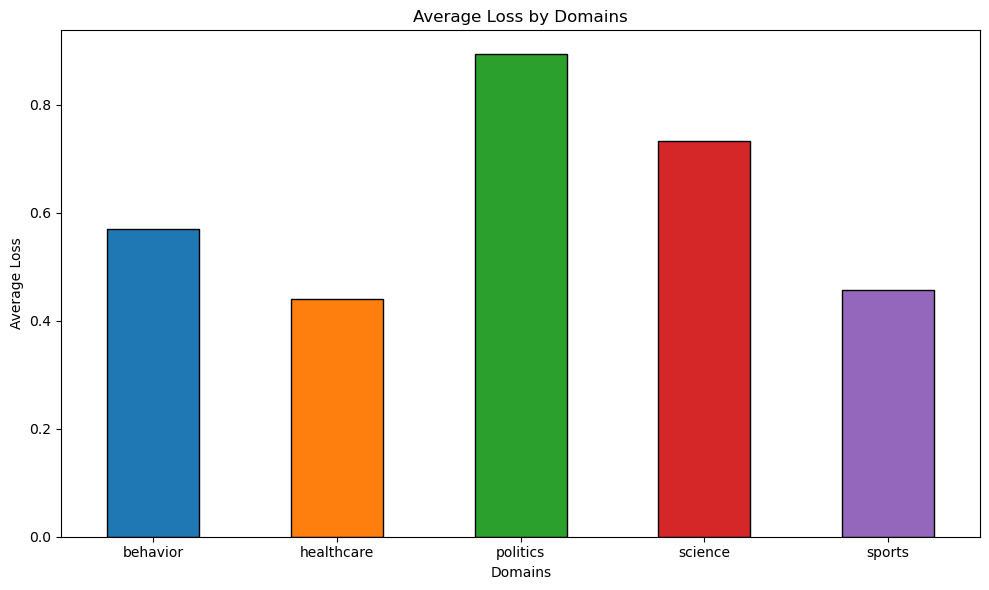

In [5]:
# Load the dataset
df = pd.read_csv('loss_by_scenario.csv')

# Display the first few rows to inspect the columns
print(df.head())

# Group by the domain column and compute the average loss per domain.
# Change 'domain' and 'loss' to match the column names in your dataset if they differ.
avg_loss = df.groupby('domain')['loss'].mean()

# Create a bar plot of the average loss by domain
plt.figure(figsize=(10, 6))
#avg_loss.plot(kind='bar', edgecolor='black')
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
avg_loss.plot(kind='bar', edgecolor='black', color=colors)
plt.xlabel('Domains')
plt.ylabel('Average Loss')
plt.title('Average Loss by Domains')
plt.xticks(rotation=0)  # Rotate labels if domain names are long
plt.tight_layout()
plt.savefig('Loss_by_Domain.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
df.head()

,domain,scenario,loss,num_rounds
0,behavior,1,0.010698,4
1,behavior,2,0.812333,6
2,behavior,3,0.643321,6
3,behavior,4,0.703994,6
4,behavior,5,0.950242,7


<Figure size 1000x600 with 0 Axes>

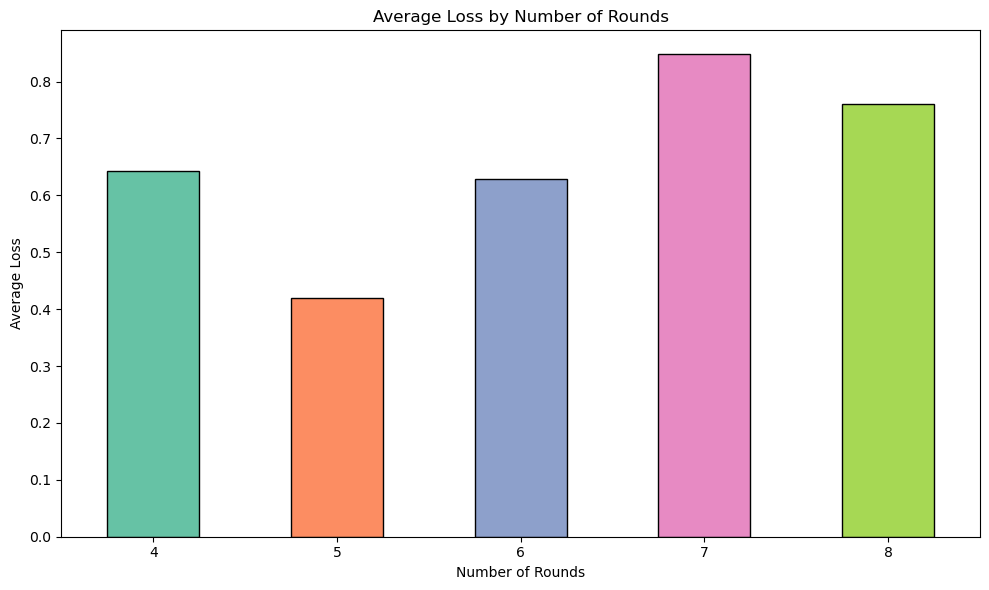

In [7]:
# Group the data by the round type and calculate the average loss for each round type.
# Replace 'round' with the appropriate column name if necessary.
avg_loss_round = df.groupby('num_rounds')['loss'].mean()

# Create a bar plot for the average loss function value by round type
plt.figure(figsize=(10, 6))
#avg_loss_round.plot(kind='bar', edgecolor='black')
# Choose custom colors for each round type
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Create the bar plot with individual bar colors
plt.figure(figsize=(10, 6))
avg_loss_round.plot(kind='bar', edgecolor='black', color=colors)
plt.xlabel('Number of Rounds')
plt.ylabel('Average Loss')
plt.title('Average Loss by Number of Rounds')
plt.xticks(rotation=0)  # Rotate the x-axis labels if they are lengthy
plt.tight_layout()
plt.savefig('Loss_by_Rounds_Type.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

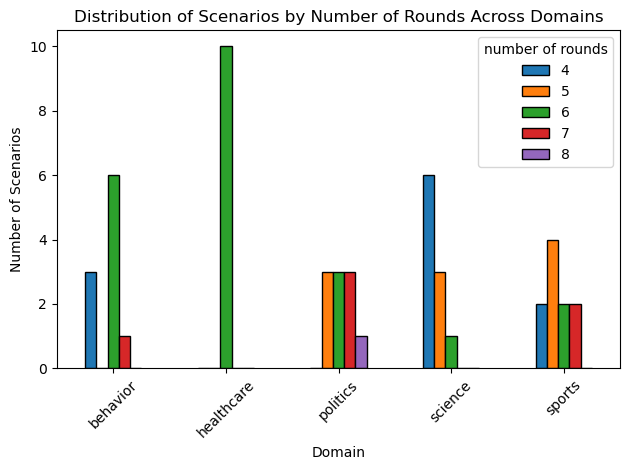

In [8]:
# Group by 'domain' and 'num_round', and count the occurrences (number of questions)
count_table = df.groupby(['domain', 'num_rounds']).size().reset_index(name='count')

# Pivot the table so that each 'num_round' type becomes a column; missing values are replaced with 0
pivot_table = count_table.pivot(index='domain', columns='num_rounds', values='count').fillna(0)

# Plot the pivot table as a grouped bar chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', edgecolor='black')

plt.xlabel('Domain')
plt.ylabel('Number of Scenarios')
plt.title('Distribution of Scenarios by Number of Rounds Across Domains')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='number of rounds')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Num_Rounds_by_Domain.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1000x600 with 0 Axes>

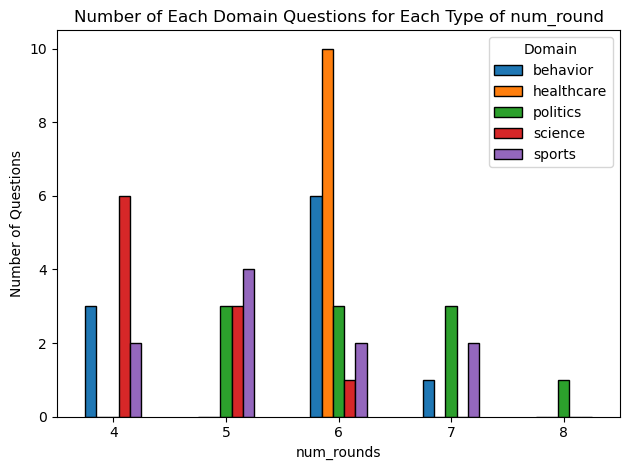

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'num_round' and 'domain' and count the occurrences (i.e. number of questions)
count_table = df.groupby(['num_rounds', 'domain']).size().reset_index(name='count')

# Pivot the table so that each 'num_round' becomes an index and each 'domain' a column
pivot_table = count_table.pivot(index='num_rounds', columns='domain', values='count').fillna(0)

# Plot the pivot table as a grouped bar chart
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', edgecolor='black')

plt.xlabel('num_rounds')
plt.ylabel('Number of Questions')
plt.title('Number of Each Domain Questions for Each Type of num_round')
plt.xticks(rotation=0)  # Set to 0 to display the x-axis labels horizontally
plt.legend(title='Domain')
plt.tight_layout()
plt.savefig('Domain_by_Num_Rounds.png', dpi=300, bbox_inches='tight')
plt.show()
